## 쇼핑몰 데이터 분석 프로젝트
# 선택3. 쇼핑몰 데이터 분석

https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

- Customer Purchase Patterns and Demographics
- [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset)  walmart.csv
- 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포 확인
- VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)

In [1]:
## 데이터 로드

import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\user\\Downloads\\data_anal_proj\\walmart.csv")
df.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.info() #컬럼의 개수 및 종류 그리고 각 컬럼의 데이터 타입 동시에 확인, null은 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
## 삭제할 컬럼 선택 : ID정보는 제품의 판매 동향, 소비자 성향 등과 관련이 없으므로 제외
df = df.drop(columns=['User_ID','Product_ID'])
df.info() #삭제된 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category            550068 non-null  int64 
 7   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 33.6+ MB


In [7]:
print(df.describe(include='object')) #문자형 컬럼에 대한 정보들도 종합적으로 확인

        Gender     Age City_Category Stay_In_Current_City_Years
count   550068  550068        550068                     550068
unique       2       7             3                          5
top          M   26-35             B                          1
freq    414259  219587        231173                     193821


In [9]:
# Age 열 범주형 값을 숫자형으로 변환, 가시성을 위해 매핑으로 진행,
df['Age'] = df['Age'].map({'0-17': 1,'18-25': 2,'26-35': 3,'36-45': 4,'46-50': 5,'51-55': 6,'55+': 7})  
df['Gender'] = df['Gender'].astype('category').cat.codes
df['City_Category'] = df['City_Category'].astype('category').cat.codes
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace("4+", 4).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int8 
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int8 
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(5), int8(2)
memory usage: 24.1 MB


In [11]:
### 시각화 ###

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int8 
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int8 
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(5), int8(2)
memory usage: 24.1 MB


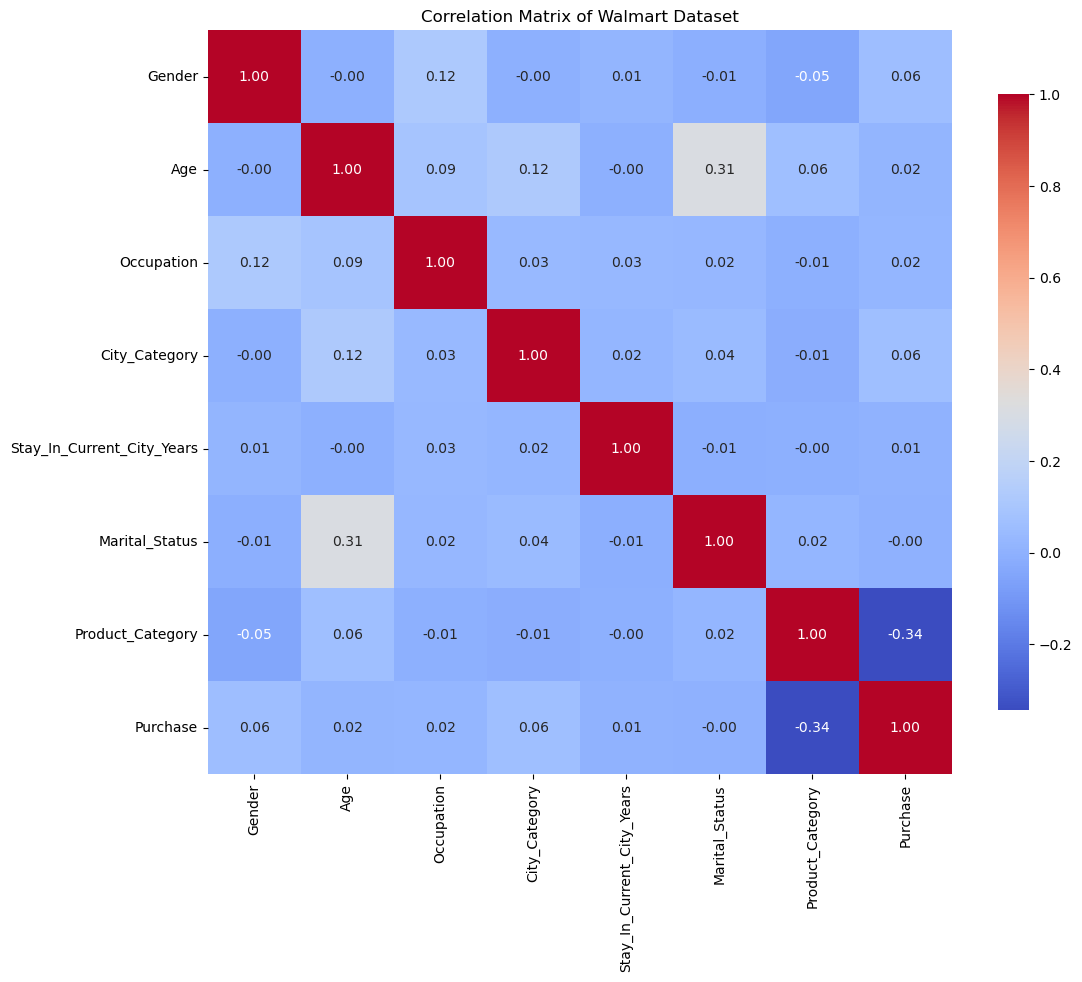

In [17]:
# 각 컬럼간의 상관관계를 히트맵으로 표현
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Walmart Dataset")
plt.show()

In [19]:
plt.rc('font', family='Malgun Gothic') #한글화

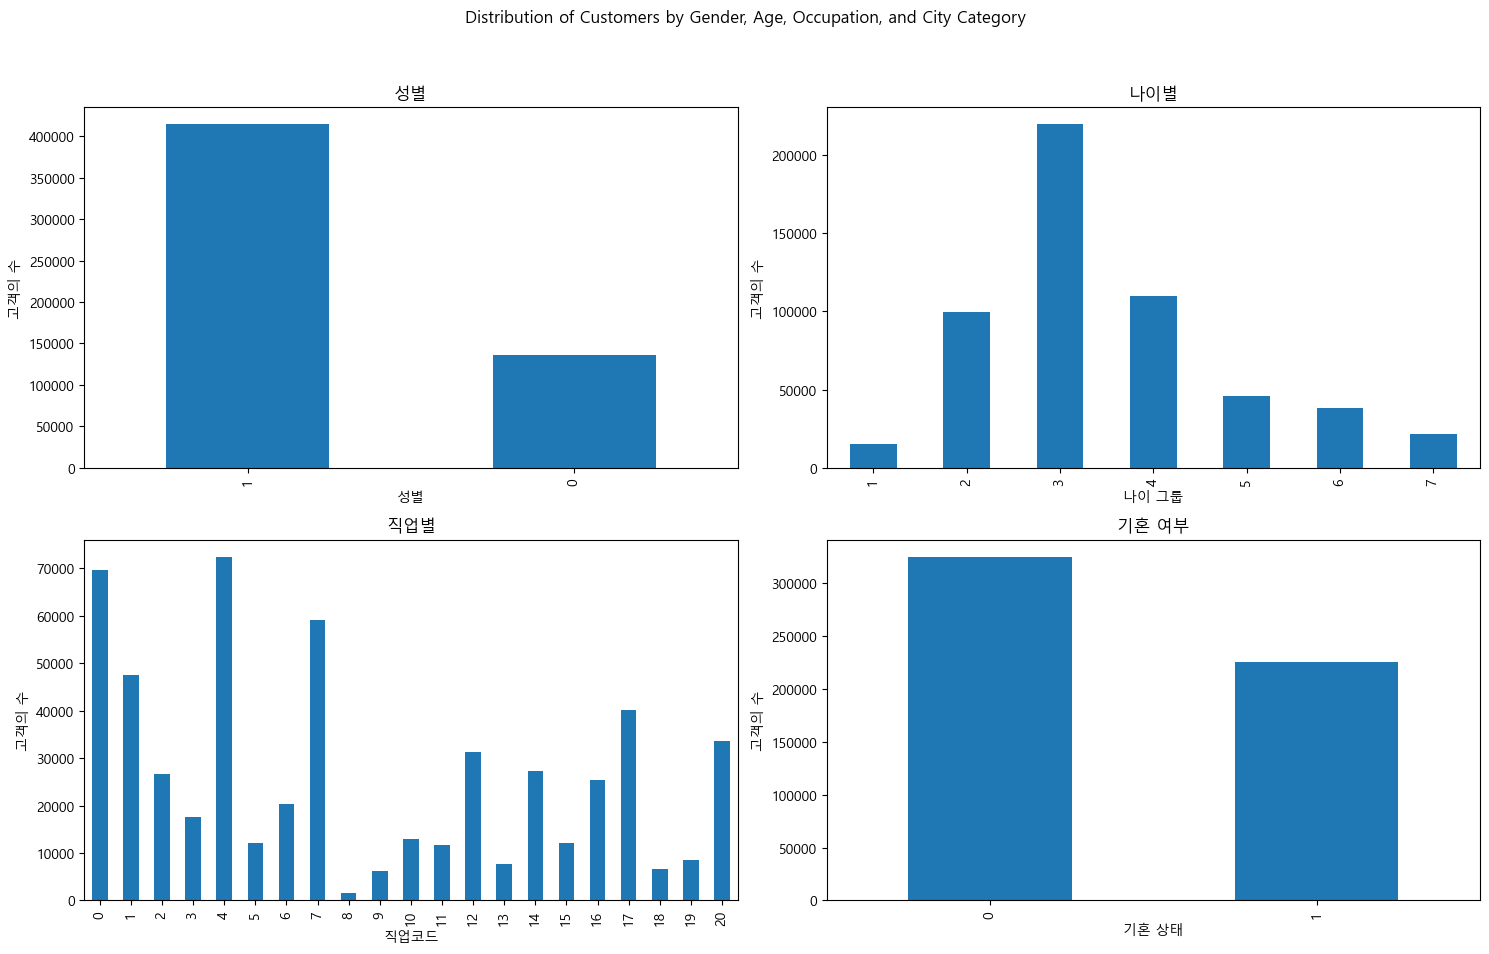

In [21]:
# 일단은 성별과 나이별, 직업별, 도시별로 어떠한 손님들이 주로 방문하는지 체크

# 그림 크기 및 레이아웃 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of Customers by Gender, Age, Occupation, and City Category")

# 성별 분포
df['Gender'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('성별')
axs[0, 0].set_xlabel('성별')
axs[0, 0].set_ylabel('고객의 수')

# 연령대 분포
df['Age'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('나이별')
axs[0, 1].set_xlabel('나이 그룹')
axs[0, 1].set_ylabel('고객의 수')

# 직업 분포
df['Occupation'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('직업별')
axs[1, 0].set_xlabel('직업코드')
axs[1, 0].set_ylabel('고객의 수')

# 기혼 여부 분포
df['Marital_Status'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('기혼 여부')
axs[1, 1].set_xlabel('기혼 상태')
axs[1, 1].set_ylabel('고객의 수')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Walmart 고객 분포 분석

### 1. 성별 분포
- 남성(1)이 여성(0)보다 고객 수가 약 2배 이상 많다. 이는 주 고객층이 남성임을 시사하며, 마케팅 전략 수립 시 남성 고객을 주요 타겟으로 고려할 필요가 있으며 여성 고객 제품 확대시 추가적인 매출 확대도 가능할 것으로 보인다. 

### 2. 나이별 분포
- 나이 그룹 중 26-35세(코드 3)와 18-25세(코드 2) 고객이 가장 많으며, 그 뒤를 36-45세(코드 4) 고객이 잇고 있다. 이 세 그룹을 타깃으로 하는 프로모션의 효과가 클 것으로 예상, 그 외 나이대에 대한 제품군은 시장 기호를 파악하고 확대하는 것 역시 필요할 것으로 보인다. 

### 3. 직업별 분포
- 다양한 직업군에서 고객이 분포하고 있으며, 특히 0, 1, 4, 7 코드의 직업군이 많은 비율을 차지, 이를 통해 직업에 따라 구매 패턴이 다를 수 있으므로, 상위 직업군을 대상으로 한 맞춤형 마케팅 전략이 필요합니다. 즉 특정 직업군에서 선호하는 상품군을 분석하여 집중 프로모션을 진행하면 효과를 극대화할 수 있을듯

### 4. 기혼여부별 분포
- 미혼 고객이 더 많기 때문에, 이들에 맞춘 프로모션과 상품 구성이 효과적일 수 있음. 그러나 기혼 고객도 적지 않으므로, 가족 단위 또는 가정용 제품군에 대한 마케팅도 유효할 것

<Figure size 1200x800 with 0 Axes>

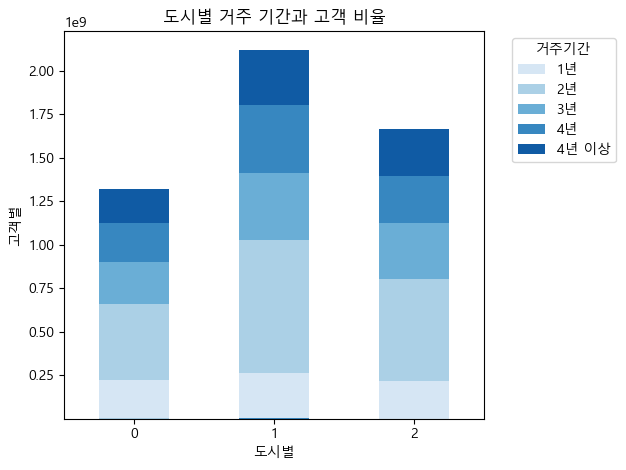

In [23]:
plt.figure(figsize=(12, 8))# 그래프 크기 설정

# 도시 카테고리와 거주 기간에 따른 고객 수 계산
df.groupby(['City_Category', 'Stay_In_Current_City_Years']).sum().unstack().fillna(0).plot(kind='bar', stacked=True, color=sns.color_palette("Blues", n_colors=5)) 
# 도시별, 거주기간별로 그룹화해 합한 값을 그래프 그래프로 표현, 이때 파란색으로 밝기차이를 적용

# 제목과 레이블 설정
plt.title("도시별 거주 기간과 고객 비율")
plt.xlabel("도시별")
plt.ylabel("고객별")
plt.xticks(rotation=0)

# 범례 설정 - "년" 단위 추가
legend_labels = ["1년", "2년", "3년", "4년", "4년 이상"]
plt.legend(title="거주기간", labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()


### 5. 도시별 거주기간별 고객 비율
- **도시 1의 인구가 가장 많으므로**에 맞춘 마케팅 전략을 강화할 수 있습니다. 해당 지역에 맞는 맞춤형 프로모션이나 상품 구성을 고려.
- 모든 도시에 **새롭게 유입된 고객**이 많은 점을 활용해, 신규 고객을 타겟으로 한 초기 할인 및 멤버십 혜택, 제품군 선정 같은 전략을 도입하면 효과적일듯.

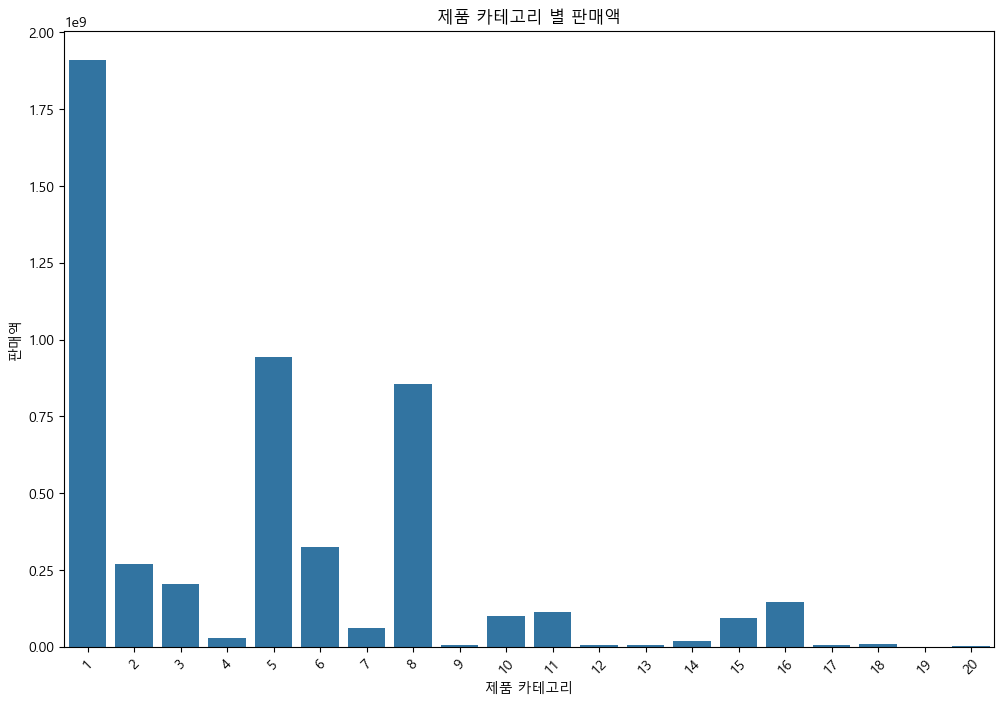

In [25]:
# 제품 유형별 총 매출 계산
product_sales = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("제품 카테고리 별 판매액")
plt.xlabel("제품 카테고리")
plt.ylabel("판매액")
plt.xticks(rotation=45)
plt.show()

# Walmart 제품 카테고리별 판매액 분석

 **주요 매출 카테고리**
   - **카테고리 1**이 다른 모든 제품군을 압도하며 가장 높은 매출을 기록했으며 그 수요가 매우 강함을 알 수 있었으며 **카테고리 5**와 **카테고리 8**이 그 뒤를 이어 높은 매출을 차지, 해당 제품군이 가장 인기가 많았음을 확인할 수 있었음. 

   - **그 외 카테고리**는 1,5,8 카테고리에 비해 현저히 적은 제품을 사용중인 것으로 보임. 단순히 수요가 낮은 제품이 아니라면 제품의 인지도, 마케팅의 부족함인지 확인하고 추가적인 조치를 고안해봐야 할듯

   - **최종적으로** 그 방향성을 구체화하기 위해 제품 카테고리 별로 어떠한 유형의 고객들이 있는지 파악해 실질적인 개선 방안을 모색하고자 함. 

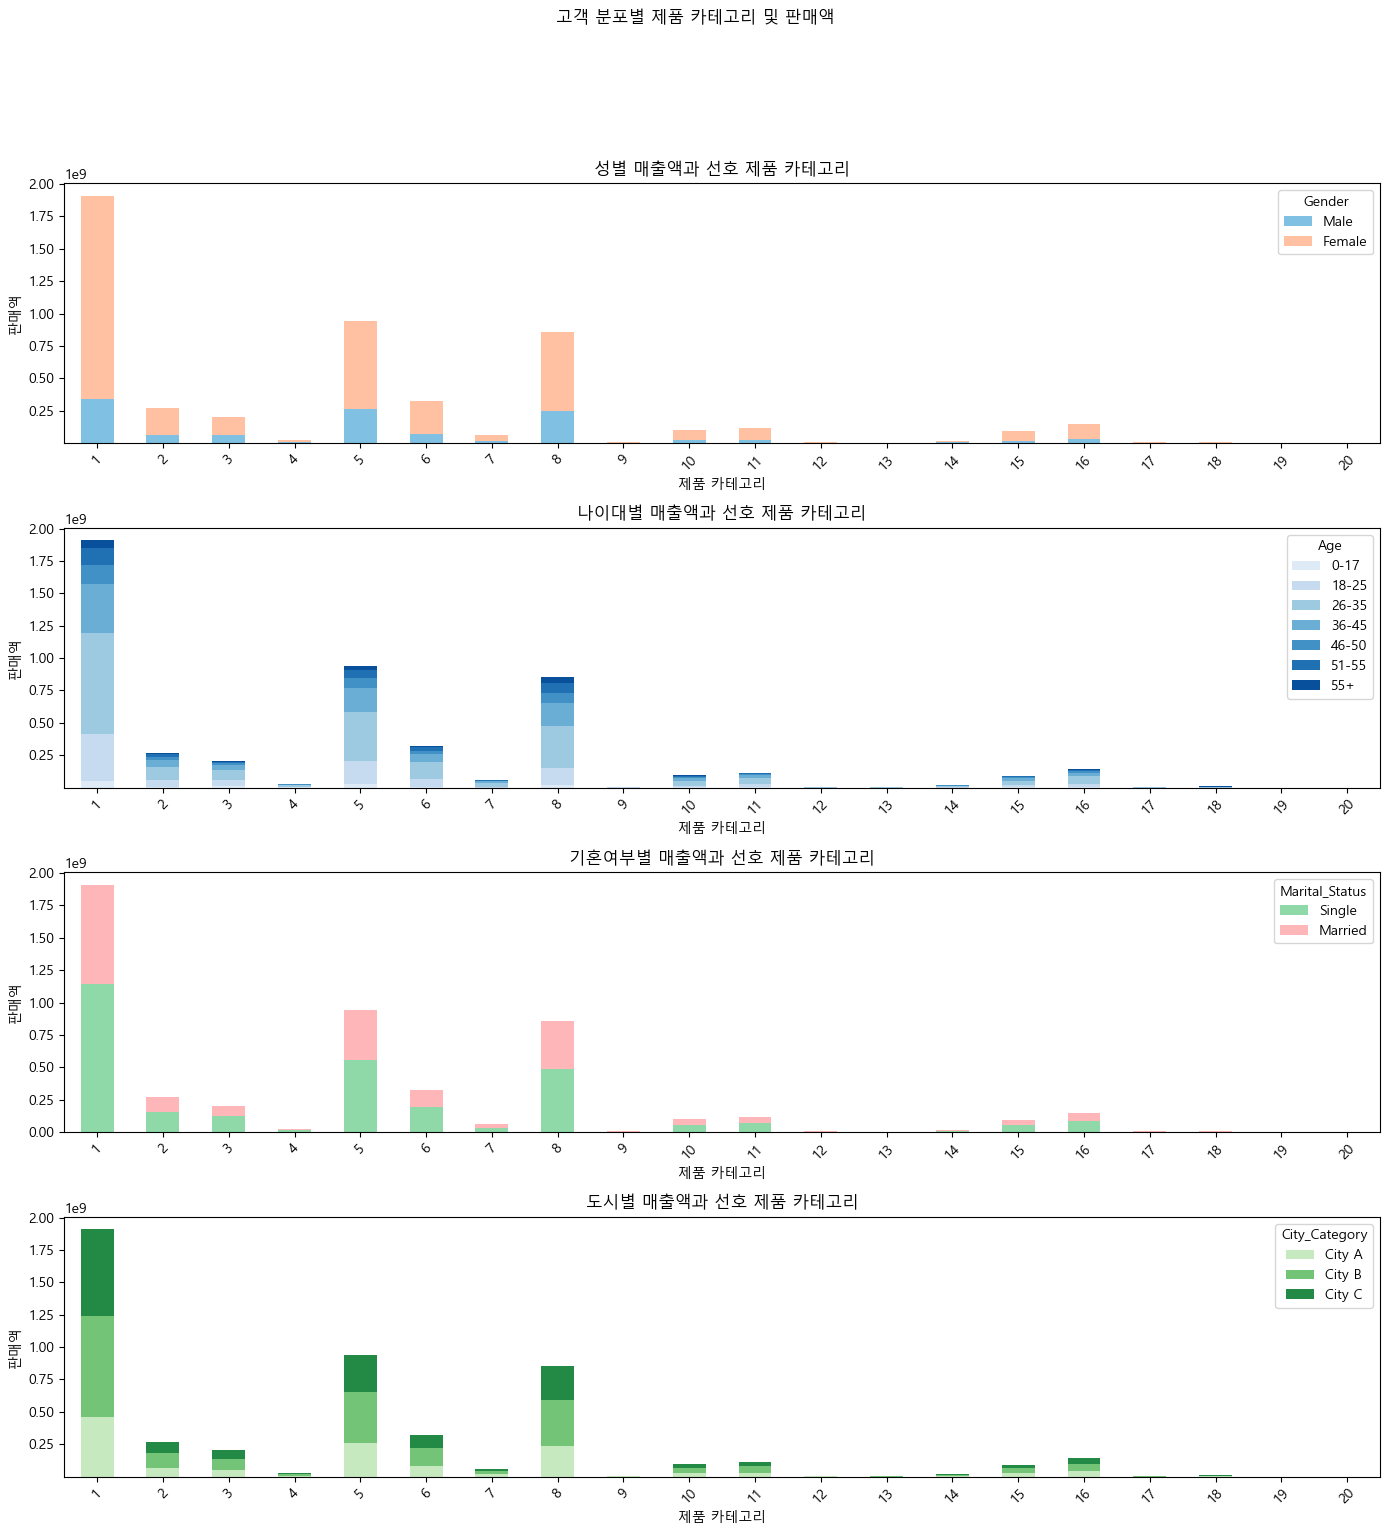

In [27]:
# 고객별 정보( : 성별, 기혼 여부, 지역별, 나이 그룹)에 따른 매출 분석을 위한 그룹 리스트
group_by_list = [
    ('Gender', ['#80C1E3', '#FFC1A1'], "성별 매출액과 선호 제품 카테고리", ["Male", "Female"]),
    ('Age', sns.color_palette("Blues", n_colors=7), "나이대별 매출액과 선호 제품 카테고리", ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]),
    ('Marital_Status', ['#8FD9A8', '#FFB6B9'], "기혼여부별 매출액과 선호 제품 카테고리", ["Single", "Married"]),
    ('City_Category', sns.color_palette("Greens", n_colors=3), "도시별 매출액과 선호 제품 카테고리", ["City A", "City B", "City C"])

]

# 그림 크기 설정 및 서브플롯 생성
fig, axs = plt.subplots(len(group_by_list), 1, figsize=(14, 15)) #가로로 길게 하여 단번에 파악할 수 있게끔 가시성을 높임
fig.suptitle("고객 분포별 제품 카테고리 및 판매액", y=1.02)

# 각 그룹별 누적 막대 그래프 생성, 이때 그래프에 입력될 라벨값들을 위에서 생성한 리스트의 튜플 요소들 값으로 불러옴
for i, (group, colors, title, legend_labels) in enumerate(group_by_list):

    df.groupby(['Product_Category', group])['Purchase'].sum().unstack().fillna(0).plot(kind='bar', stacked=True, color=colors, ax=axs[i], legend=False)
    # 누적 막대 그래프, 순서대로 해석하면 우선 그룹화 시켜 이를  sum하여 행을 열로 변환*unstack시켜 결측치를 제거한다. 즉 하나의 막대를 쪼개는 역할
    axs[i].set_title(title) #타이들을 변수로 받아옴
    axs[i].set_xlabel("제품 카테고리")
    axs[i].set_ylabel("판매액")
    axs[i].tick_params(axis='x', rotation=45)
    
    # 범례를 설정해 그래프의 가시성을 높임
    handles, _ = axs[i].get_legend_handles_labels() #그래프의 내용이 담긴 객체를 불러와 그래의 대한 것은 handles객체에 저장
    axs[i].legend(handles, legend_labels, title=group, loc='upper right') #해당 객체에 대해 범례를 리스트로 저장된 객체(legend_labels)로 불러와 표현

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Walmart 제품 카테고리별 매출 분석 (성별, 나이대, 기혼 여부, 도시별)

### 1. 성별 매출과 선호 제품 카테고리
  - **카테고리 1**에서 남성의 매출이 압도적으로 높으며, **카테고리 5와 8**에서도 높은 매출을 보임
  - 여성은 **카테고리 6**에서 비교적 두드러진 매출을 보였음.
  - 남성 고객을 대상으로 한 마케팅이 효과적일 가능성이 높으며, 카테고리 6은 여성 고객의 선호도가 상대적으로 높은 제품군이므로 여성 타겟팅이 효과적일 수 있음.

### 2. 나이대별 매출과 선호 제품 카테고리
  - 26-35세와 18-25세 고객이 Walmart의 주요 소비층으로 보이며, 이들 연령대에 맞춘 상품 구성이 효과적일 수 있습니다. 특히, 26-35세 연령대는 주요 제품 카테고리에서 높은 매출을 보이고 있어 집중적인 마케팅이 필요합니다.

### 3. 기혼 여부에 따른 매출과 선호 제품 카테고리
  - **카테고리 1**과 **카테고리 5**에서 미혼 고객의 매출이 두드러지며, 이는 Walmart의 주요 매출을 차지하는 고객층이 미혼임을 시사, 다만 **카테고리 8**에서는 기혼 고객의 매출 비율이 조금 더 높은 편
  - 미혼 고객을 위한 마케팅 전략이 효과적일 가능성이 높음. 기혼 고객이 선호하는 카테고리 8에 대해서는 가족 단위의 프로모션이나 혜택을 제공하면 매출에 도움이 될 것

### 4. 도시별 매출과 선호 제품 카테고리
- 도시 A를 중심으로 한 마케팅 전략이 유효할 가능성이 높음. 그러나 도시 B와 C도 카테고리 5와 8에서는 상대적으로 큰 매출을 기록하고 있으므로, 이들 지역을 대상으로 한 맞춤형 캠페인도 고려하면 매출에 도움이 될 것

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_72832\2477025447.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(['Female', 'Male'])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_72832\2477025447.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['미혼', '기혼'])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_72832\2477025447.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(['City A', 'City B', 'City C'])


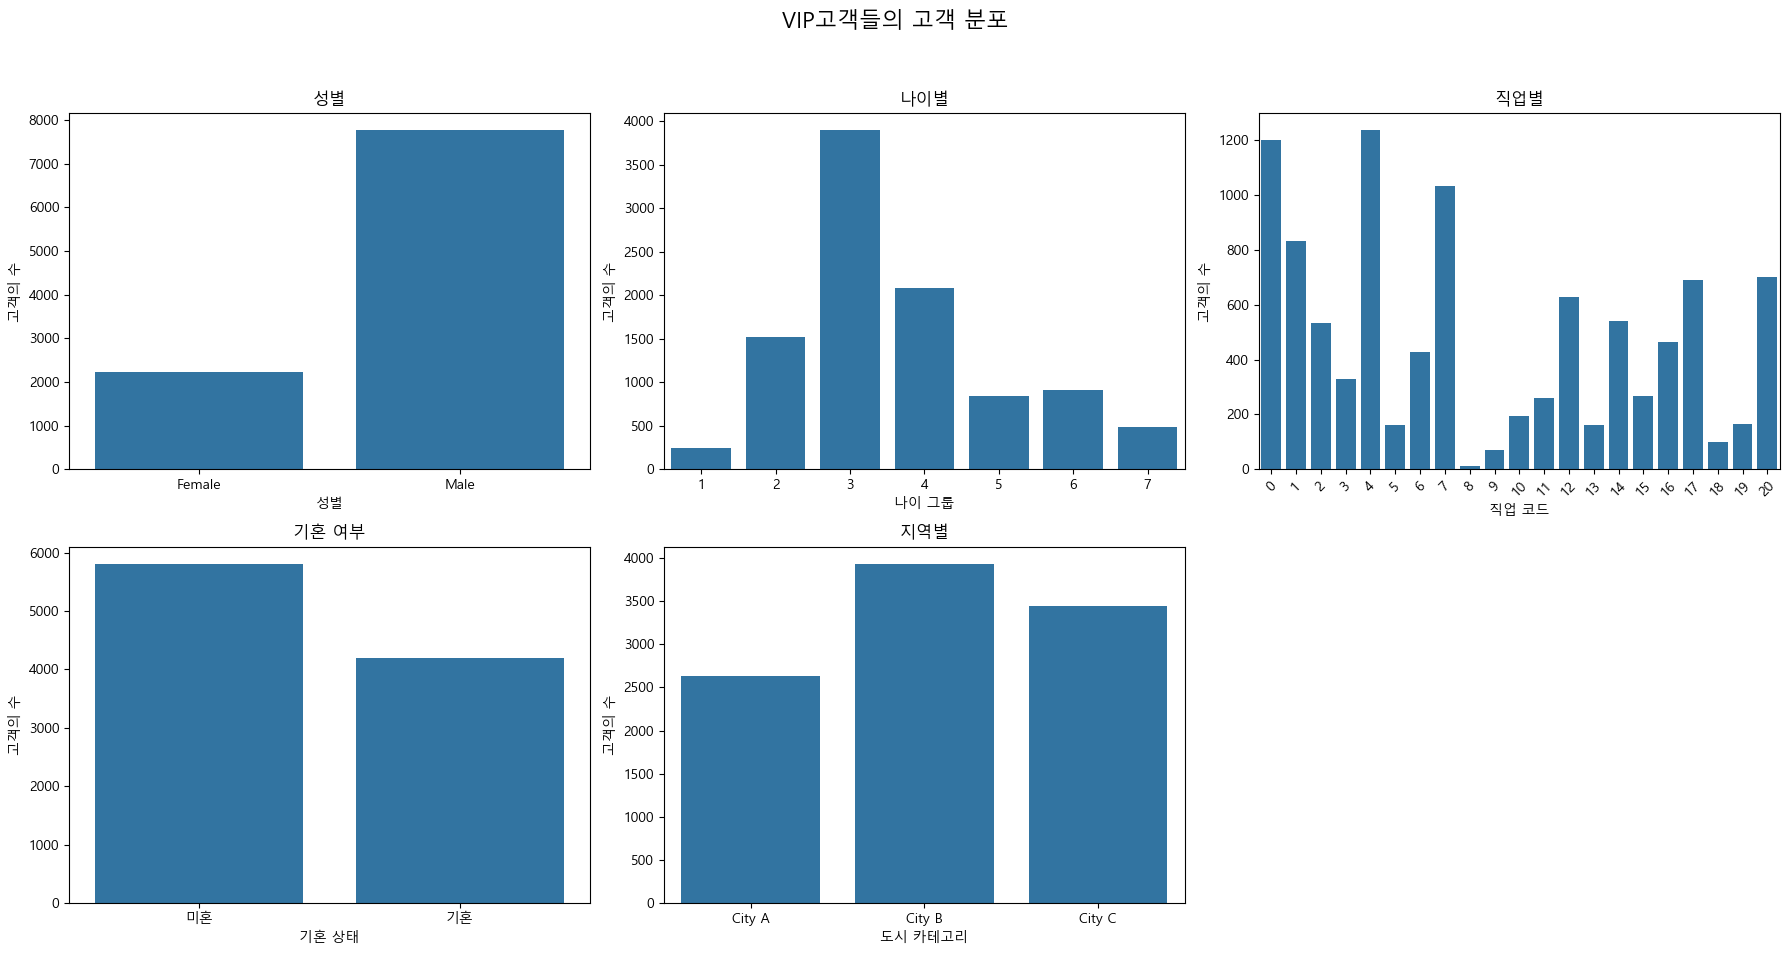

In [29]:
## 가장 높은 판매액을 가진 1만명의 고객(VIP)에 대한 데이터를 분석
vip_customers = df.nlargest(10000, 'Purchase') # 상위 1만명의 고객 데이터 추출

# 그래프 크기 및 레이아웃 설정 (5개의 그래프이므로 2x3 배열)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("VIP고객들의 고객 분포", fontsize=16)

# 성별
sns.countplot(data=vip_customers, x='Gender', ax=axs[0, 0])
axs[0, 0].set_title('성별')
axs[0, 0].set_xlabel('성별')
axs[0, 0].set_ylabel('고객의 수')
axs[0, 0].set_xticklabels(['Female', 'Male'])

# 나이대
sns.countplot(data=vip_customers, x='Age', ax=axs[0, 1])
axs[0, 1].set_title('나이별')
axs[0, 1].set_xlabel('나이 그룹')
axs[0, 1].set_ylabel('고객의 수')

# 직업
sns.countplot(data=vip_customers, x='Occupation', ax=axs[0, 2])
axs[0, 2].set_title('직업별')
axs[0, 2].set_xlabel('직업 코드')
axs[0, 2].set_ylabel('고객의 수')
axs[0, 2].tick_params(axis='x', rotation=45)

# 기혼 여부
sns.countplot(data=vip_customers, x='Marital_Status', ax=axs[1, 0])
axs[1, 0].set_title('기혼 여부')
axs[1, 0].set_xlabel('기혼 상태')
axs[1, 0].set_ylabel('고객의 수')
axs[1, 0].set_xticklabels(['미혼', '기혼'])

# 지역
sns.countplot(data=vip_customers, x='City_Category', ax=axs[1, 1])
axs[1, 1].set_title('지역별')
axs[1, 1].set_xlabel('도시 카테고리')
axs[1, 1].set_ylabel('고객의 수')
axs[1, 1].set_xticklabels(['City A', 'City B', 'City C'])

# 빈 공간 제거
axs[1, 2].axis('off')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Walmart 구매액 상위 1만명 고객에 대한 분포 분석

- **VIP 고객 특성**:
  - 성별: 남성 고객 비율이 높음
  - 나이대: 26-35세가 가장 많으며, 18-45세 연령대가 주를 이룸
  - 직업: 직업군(코드 0, 4, 7, 17)에 고객이 가장 많았음
  - 기혼 여부: 미혼 고객 비율이 높음
  - 지역: City B와 City C에 많이 분포
  
- **최종**:
  - 주요 연령대인 18-45세, 특히 26-35세를 타겟으로 한 프로모션을 진행
  - 남성 고객을 위한 맞춤형 상품 및 서비스를 제공
  - 미혼 고객의 라이프스타일에 맞춘 제품 추천 및 혜택 제공
  - City B와 City C 지역에 특화된 로컬 마케팅 강화